In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv(r"C:\Users\302-28\git-repo\Dacon\기업 성공 확률 예측 해커톤\data\train.csv").drop('ID', axis = 1)
ex = pd.read_csv(r"C:\Users\302-28\git-repo\Dacon\기업 성공 확률 예측 해커톤\data\test.csv").drop('ID', axis = 1)

In [ ]:
data['직원 수'].fillna(data['직원 수'].median(), inplace= True)
ex['직원 수'].fillna(ex['직원 수'].median(), inplace= True)
#data.dropna(inplace=True)

In [51]:
current_year = 2025
data['회사나이'] = current_year - data['설립연도']
ex['회사나이'] = current_year - ex['설립연도']
data.drop('설립연도', axis= 1, inplace= True)
ex.drop('설립연도', axis= 1, inplace= True)

In [5]:
data.head()

,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률,회사나이
0,CT005,이커머스,Series A,4126.0,No,No,56.0,3365.0,4764.0,4.71,NaN,0.3,16
1,CT006,핀테크,Seed,4167.0,Yes,No,80.0,4069.0,279.0,1.00,2500-3500,0.8,2
2,CT007,기술,Series A,3132.0,Yes,Yes,54.0,6453.0,12141.0,4.00,3500-4500,0.5,7
3,CT006,NaN,Seed,3245.0,Yes,Yes,NaN,665.0,10547.0,2.97,NaN,0.7,9
4,CT002,에듀테크,Seed,1969.0,No,Yes,94.0,829.0,9810.0,1.00,1500-2500,0.1,5


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = data.dropna(subset=['분야']) # 데이터의 분야 특성에만 결측치가 있는 경우 제외, 즉 X는 학습데이터
y = X['분야']
X = X.drop('분야', axis= 1)

test = data[data['분야'].isnull()]
test = test.drop('분야', axis= 1)

X =X[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

test =test[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

X_encoding = pd.get_dummies(X,columns=['국가','투자단계'])
test_encoding = pd.get_dummies(test,columns=['국가','투자단계'])

rdfc = RandomForestClassifier()

cross_val_score(rdfc, X_encoding, y, cv= 5)

rdfc.fit(X_encoding,y)

prediction = rdfc.predict(test_encoding)

data.loc[data['분야'].isnull(),'분야'] = prediction

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = data.dropna(subset=['고객수(백만명)']) # 데이터의 분야 특성에만 결측치가 있는 경우 제외, 즉 X는 학습데이터
y = X['고객수(백만명)']
X = X.drop('고객수(백만명)', axis= 1)

test = data[data['고객수(백만명)'].isnull()]
test = test.drop('고객수(백만명)', axis= 1)

X =X[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

test =test[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

X_encoding = pd.get_dummies(X,columns=['국가','투자단계'])
test_encoding = pd.get_dummies(test,columns=['국가','투자단계'])

rdfr = RandomForestRegressor()

cross_val_score(rdfr, X_encoding, y, cv= 5)

rdfr.fit(X_encoding,y)

prediction = rdfr.predict(test_encoding)

data.loc[data['고객수(백만명)'].isnull(),'고객수(백만명)'] = prediction

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = data.dropna(subset=['기업가치(백억원)']) # 데이터의 분야 특성에만 결측치가 있는 경우 제외, 즉 X는 학습데이터
y = X['기업가치(백억원)']
X = X.drop('기업가치(백억원)', axis= 1)

test = data[data['기업가치(백억원)'].isnull()]
test = test.drop('기업가치(백억원)', axis= 1)

X =X[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

test =test[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

X_encoding = pd.get_dummies(X,columns=['국가','투자단계'])
test_encoding = pd.get_dummies(test,columns=['국가','투자단계'])

rdfc = RandomForestClassifier()

cross_val_score(rdfc, X_encoding, y, cv= 5)

rdfc.fit(X_encoding,y)

prediction = rdfc.predict(test_encoding)

data.loc[data['기업가치(백억원)'].isnull(),'기업가치(백억원)'] = prediction

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = ex.dropna(subset=['분야']) # 데이터의 분야 특성에만 결측치가 있는 경우 제외, 즉 X는 학습데이터
y = X['분야']
X = X.drop('분야', axis= 1)

test = ex[ex['분야'].isnull()]
test = test.drop('분야', axis= 1)

X =X[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

test =test[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

X_encoding = pd.get_dummies(X,columns=['국가','투자단계'])
test_encoding = pd.get_dummies(test,columns=['국가','투자단계'])

rdfc = RandomForestClassifier()

cross_val_score(rdfc, X_encoding, y, cv= 5)

rdfc.fit(X_encoding,y)

prediction = rdfc.predict(test_encoding)

ex.loc[ex['분야'].isnull(),'분야'] = prediction

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = ex.dropna(subset=['고객수(백만명)']) # 데이터의 분야 특성에만 결측치가 있는 경우 제외, 즉 X는 학습데이터
y = X['고객수(백만명)']
X = X.drop('고객수(백만명)', axis= 1)

test = ex[ex['고객수(백만명)'].isnull()]
test = test.drop('고객수(백만명)', axis= 1)

X =X[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

test =test[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

X_encoding = pd.get_dummies(X,columns=['국가','투자단계'])
test_encoding = pd.get_dummies(test,columns=['국가','투자단계'])

rdfr = RandomForestRegressor()

cross_val_score(rdfr, X_encoding, y, cv= 5)

rdfr.fit(X_encoding,y)

prediction = rdfr.predict(test_encoding)

ex.loc[ex['고객수(백만명)'].isnull(),'고객수(백만명)'] = prediction

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = ex.dropna(subset=['기업가치(백억원)']) # 데이터의 분야 특성에만 결측치가 있는 경우 제외, 즉 X는 학습데이터
y = X['기업가치(백억원)']
X = X.drop('기업가치(백억원)', axis= 1)

test = ex[ex['기업가치(백억원)'].isnull()]
test = test.drop('기업가치(백억원)', axis= 1)

X =X[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

test =test[['회사나이', '국가', '투자단계','직원 수', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']]

X_encoding = pd.get_dummies(X,columns=['국가','투자단계'])
test_encoding = pd.get_dummies(test,columns=['국가','투자단계'])

rdfc = RandomForestClassifier()

cross_val_score(rdfc, X_encoding, y, cv= 5)

rdfc.fit(X_encoding,y)

prediction = rdfc.predict(test_encoding)

ex.loc[ex['기업가치(백억원)'].isnull(),'기업가치(백억원)'] = prediction

In [13]:
data.head(10)

,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률,회사나이
0,CT005,이커머스,Series A,4126.0,No,No,56.00,3365.0,4764.0,4.71,2500-3500,0.3,16
1,CT006,핀테크,Seed,4167.0,Yes,No,80.00,4069.0,279.0,1.00,2500-3500,0.8,2
2,CT007,기술,Series A,3132.0,Yes,Yes,54.00,6453.0,12141.0,4.00,3500-4500,0.5,7
3,CT006,기술,Seed,3245.0,Yes,Yes,48.70,665.0,10547.0,2.97,4500-6000,0.7,9
4,CT002,에듀테크,Seed,1969.0,No,Yes,94.00,829.0,9810.0,1.00,1500-2500,0.1,5
5,CT008,기술,Series C,3801.0,No,Yes,69.00,6505.0,12722.0,3.00,2500-3500,0.6,13
6,CT010,게임,Series B,818.0,No,Yes,47.56,3049.0,666.0,0.76,2500-3500,0.4,17
7,CT002,게임,Series A,2617.0,No,No,80.00,5579.0,5399.0,4.00,3500-4500,0.7,5
8,CT002,에너지,Series B,2472.0,No,No,45.76,2722.0,2568.0,4.94,4500-6000,0.9,20
9,CT008,물류,Series B,1757.0,No,No,50.24,285.0,11758.0,2.33,3500-4500,0.5,16


In [ ]:
#from sklearn.preprocessing import LabelEncoder

#col_one = ['국가', '분야', '인수여부','상장여부']
#col_numeric = ['투자단계','기업가치(백억원)']

#encoder = LabelEncoder()

#for col in col_numeric:
#    data[col] = encoder.fit_transform(data[col])
#    ex[col] = encoder.transform(ex[col])

#encoding_data = pd.get_dummies(data, columns=col_one)
#encoding_ex = pd.get_dummies(ex, columns=col_one)


In [58]:
col_one = ['국가', '분야', '인수여부','상장여부','투자단계','기업가치(백억원)']

encoding_data = pd.get_dummies(data, columns=col_one)
encoding_ex = pd.get_dummies(ex, columns=col_one)

In [15]:
encoding_data.head(10)

,투자단계,직원 수,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률,회사나이,국가_CT001,...,분야_에너지,분야_에듀테크,분야_이커머스,분야_푸드테크,분야_핀테크,분야_헬스케어,인수여부_No,인수여부_Yes,상장여부_No,상장여부_Yes
0,2,4126.0,56.00,3365.0,4764.0,4.71,1,0.3,16,False,...,False,False,True,False,False,False,True,False,True,False
1,1,4167.0,80.00,4069.0,279.0,1.00,1,0.8,2,False,...,False,False,False,False,True,False,False,True,True,False
2,2,3132.0,54.00,6453.0,12141.0,4.00,2,0.5,7,False,...,False,False,False,False,False,False,False,True,False,True
3,1,3245.0,48.70,665.0,10547.0,2.97,3,0.7,9,False,...,False,False,False,False,False,False,False,True,False,True
4,1,1969.0,94.00,829.0,9810.0,1.00,0,0.1,5,False,...,False,True,False,False,False,False,True,False,False,True
5,4,3801.0,69.00,6505.0,12722.0,3.00,1,0.6,13,False,...,False,False,False,False,False,False,True,False,False,True
6,3,818.0,47.56,3049.0,666.0,0.76,1,0.4,17,False,...,False,False,False,False,False,False,True,False,False,True
7,2,2617.0,80.00,5579.0,5399.0,4.00,2,0.7,5,False,...,False,False,False,False,False,False,True,False,True,False
8,3,2472.0,45.76,2722.0,2568.0,4.94,3,0.9,20,False,...,True,False,False,False,False,False,True,False,True,False
9,3,1757.0,50.24,285.0,11758.0,2.33,2,0.5,16,False,...,False,False,False,False,False,False,True,False,True,False


In [59]:
col_scale = ['직원 수', '고객수(백만명)', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

X = encoding_data.drop(['성공확률'], axis= 1)
y = encoding_data['성공확률']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[col_scale])
ex_scaled = scaler.transform(encoding_ex[col_scale])

rdf = RandomForestRegressor()

cross_score = cross_val_score(rdf, X_scaled, y, cv = 5)

rdf.fit(X_scaled,y) 

result = rdf.predict(ex_scaled)

sample = pd.read_csv(r"C:\Users\302-28\git-repo\Dacon\기업 성공 확률 예측 해커톤\data\sample_submission.csv")

sample['성공확률'] = result

print(cross_score, np.mean(cross_score))

sample.to_csv('result.csv', index= False)

[0.02453437 0.03679749 0.00333425 0.01959466 0.00349154] 0.017550460629287112


In [62]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

clf = LazyRegressor()
models = clf.fit(X_train, X_test, y_train, y_test)

# 결과 출력
print(models)

 21%|██▏       | 9/42 [00:01<00:05,  5.86it/s]  File "c:\Users\302-28\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\302-28\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\302-28\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\302-28\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
100%|██████████| 42/42 [00:09<00:00,  4.60it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1261
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 5
[LightGBM] [Info] Start training from score 0.534486
(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.02       0.03  0.24        1.93
ExtraTreesRegressor                          0.02       0.03  0.24        0.70
LinearSVR                                   -0.00       0.00  0.24        0.03
HuberRegressor                              -0.00       0.00  0.24        0.04
BayesianRidge                               -0.01      -0.00  0.24        0.05
PoissonRegressor                            -0.01      -0.00  0.24        0.01
LassoLarsIC                

위에는 auto ml 을 사용한 결과

데이터들을 불러옵니다

In [127]:
data = pd.read_csv(r"C:\Users\302-28\git-repo\Dacon\기업 성공 확률 예측 해커톤\data\train.csv").drop('ID', axis = 1)
test = pd.read_csv(r"C:\Users\302-28\git-repo\Dacon\기업 성공 확률 예측 해커톤\data\test.csv").drop('ID', axis = 1)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   설립연도            4376 non-null   int64  
 1   국가              4376 non-null   object 
 2   분야              3519 non-null   object 
 3   투자단계            4376 non-null   object 
 4   직원 수            4202 non-null   float64
 5   인수여부            4376 non-null   object 
 6   상장여부            4376 non-null   object 
 7   고객수(백만명)        3056 non-null   float64
 8   총 투자금(억원)       4376 non-null   float64
 9   연매출(억원)         4376 non-null   float64
 10  SNS 팔로워 수(백만명)  4376 non-null   float64
 11  기업가치(백억원)       3156 non-null   object 
 12  성공확률            4376 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 444.6+ KB


In [129]:
data.head(10)

,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
0,2009,CT005,이커머스,Series A,4126.0,No,No,56.0,3365.0,4764.0,4.71,NaN,0.3
1,2023,CT006,핀테크,Seed,4167.0,Yes,No,80.0,4069.0,279.0,1.00,2500-3500,0.8
2,2018,CT007,기술,Series A,3132.0,Yes,Yes,54.0,6453.0,12141.0,4.00,3500-4500,0.5
3,2016,CT006,NaN,Seed,3245.0,Yes,Yes,NaN,665.0,10547.0,2.97,NaN,0.7
4,2020,CT002,에듀테크,Seed,1969.0,No,Yes,94.0,829.0,9810.0,1.00,1500-2500,0.1
5,2012,CT008,기술,Series C,3801.0,No,Yes,69.0,6505.0,12722.0,3.00,2500-3500,0.6
6,2008,CT010,NaN,Series B,818.0,No,Yes,NaN,3049.0,666.0,0.76,2500-3500,0.4
7,2020,CT002,게임,Series A,2617.0,No,No,80.0,5579.0,5399.0,4.00,3500-4500,0.7
8,2005,CT002,NaN,Series B,NaN,No,No,NaN,2722.0,2568.0,4.94,NaN,0.9
9,2009,CT008,NaN,Series B,1757.0,No,No,NaN,285.0,11758.0,2.33,NaN,0.5


In [130]:
data.describe()

,설립연도,직원 수,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),성공확률
count,4376.000000,4202.000000,3056.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,2012.006856,2471.324369,49.214332,3314.568556,6452.202239,2.578103,0.537340
std,6.554872,1446.064215,27.141242,1880.103831,3782.792656,1.414590,0.241698
min,2001.000000,5.000000,1.000000,12.000000,12.000000,0.000000,0.100000
25%,2006.000000,1218.250000,27.000000,1651.500000,3094.250000,1.320000,0.400000
50%,2012.000000,2472.000000,49.000000,3398.000000,6478.500000,2.835000,0.600000
75%,2018.000000,3727.500000,72.000000,4908.250000,9692.500000,4.000000,0.700000
max,2023.000000,4998.000000,99.000000,7059.000000,14822.000000,5.000000,0.900000


위와 같이 data의 13개의 특성들 중 분야, 직원 수, 고객수(백만명), 기업가치(백억원) 등 4개의 특성들이 결측치를 가진다.

<Axes: >

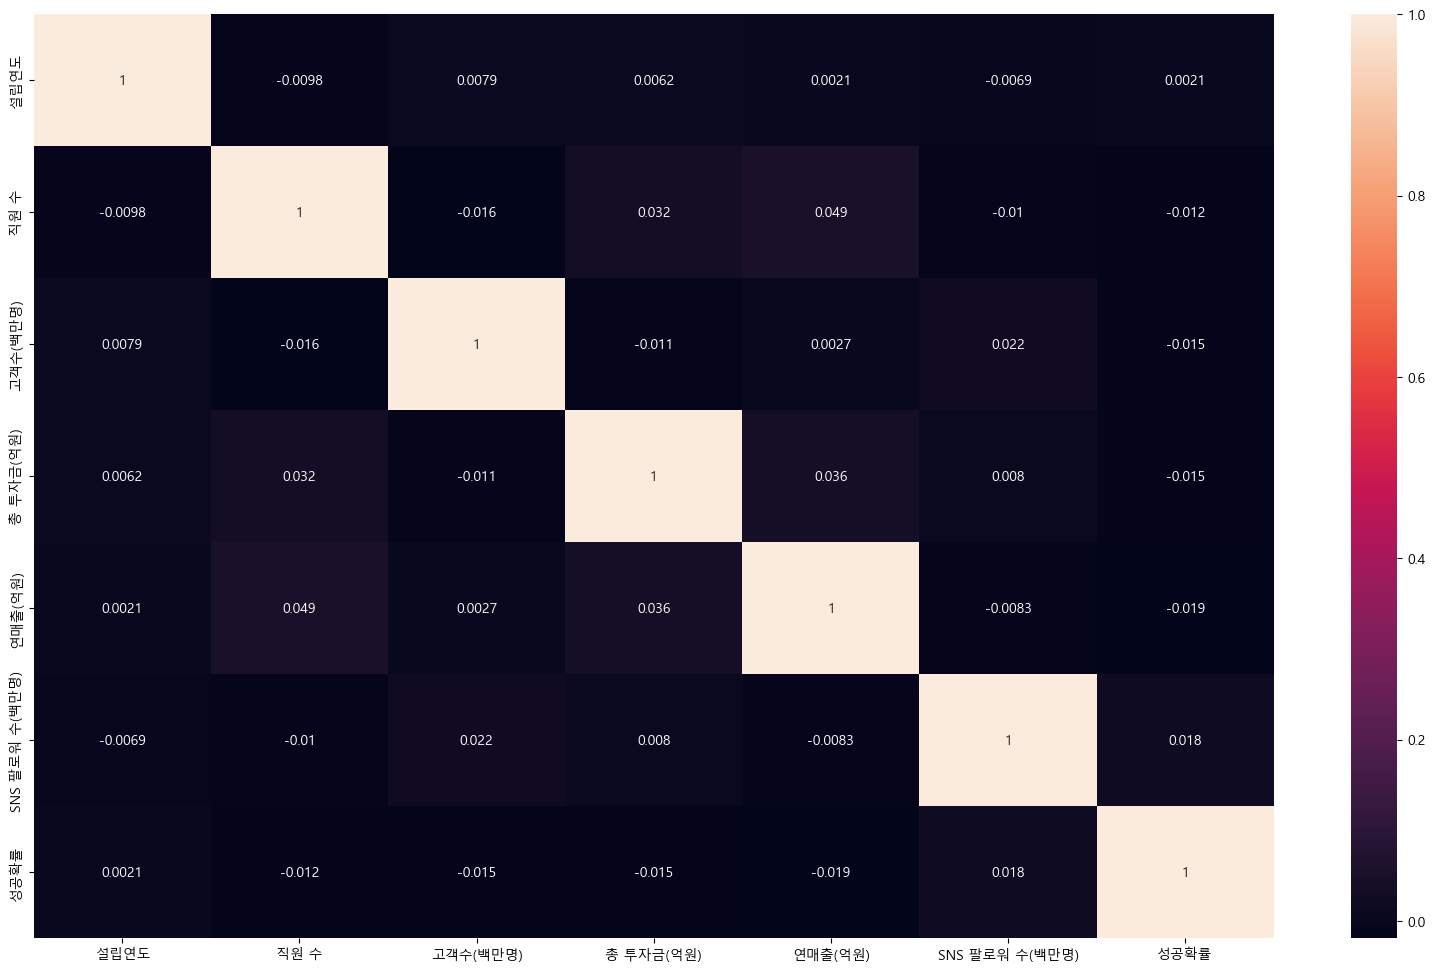

In [131]:
tem = data.drop(['국가', '분야', '투자단계', '인수여부', '상장여부', '기업가치(백억원)'], axis=1)

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(20, 12))
sns.heatmap(tem.corr(), annot= True)

직원 수의 결측치는 적은 편이기에 median으로 채운후 수치형 데이터들 중 nan 값을 가지지 않는 값과 성공확률의 상관관계 히트맵을 그렸습니다. 보시는바와 같이 성공확률과 나머지 특성들의 상관관계 값은 매우 작습니다. 

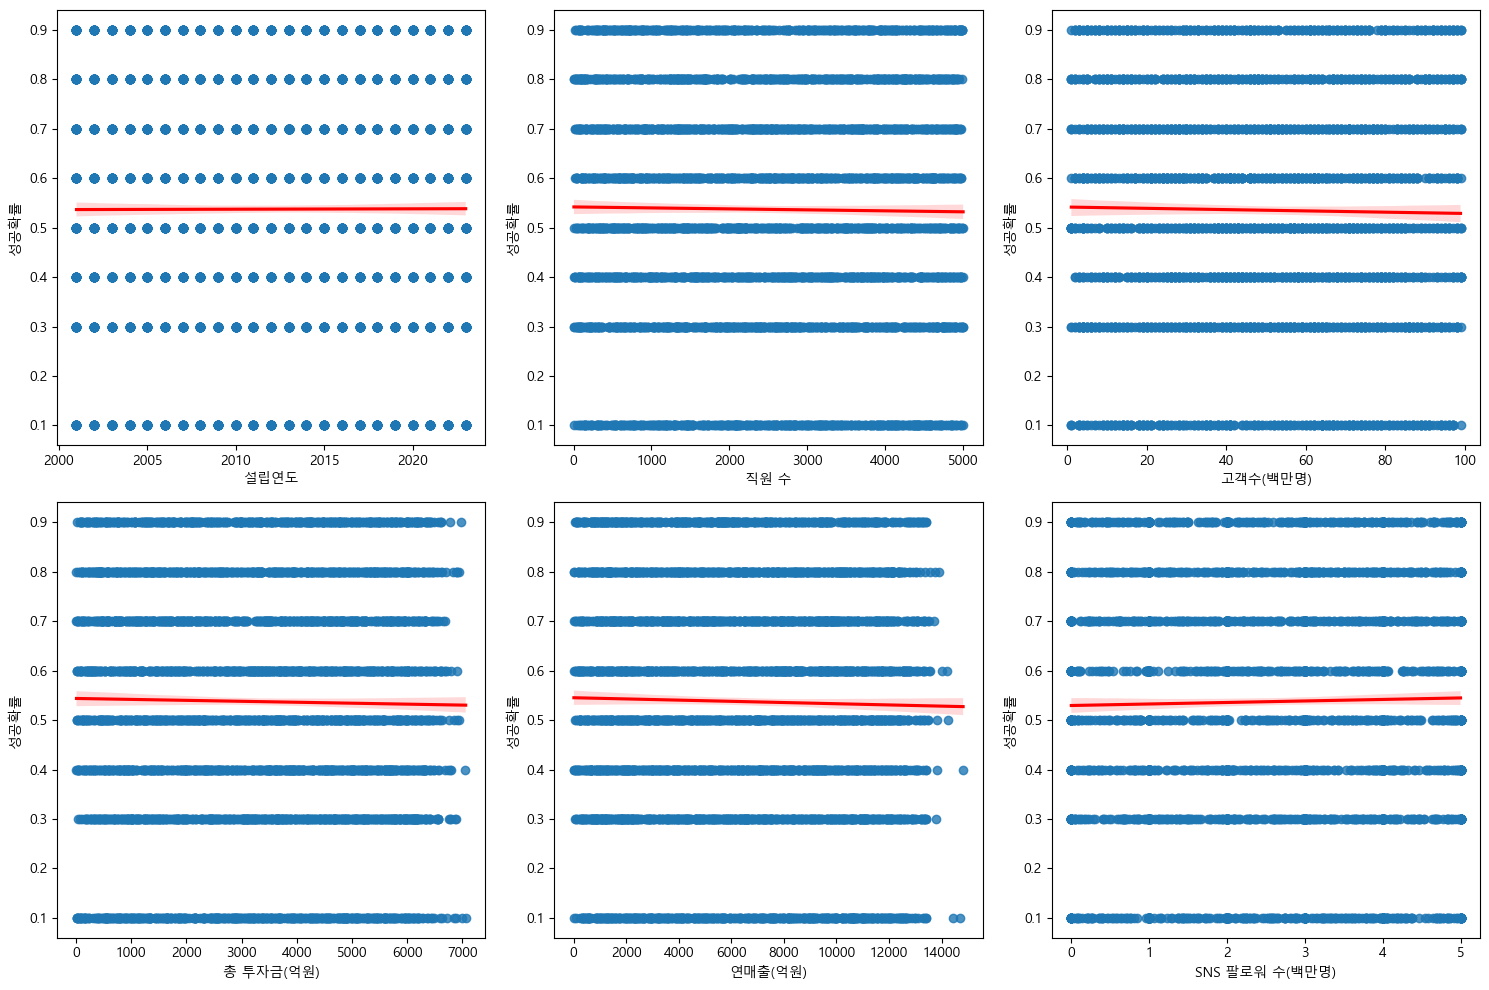

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

colm = ['설립연도', '직원 수', '고객수(백만명)', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(colm):
    ax = axes[i//3, i%3]  
    sns.regplot(x=col, y='성공확률', data= data, ax= ax,line_kws={'color' : 'red'})

plt.tight_layout()
plt.show()

이상하게 성공확률 0.2인 회사가 존재하지 않는다는걸 확인 할수 있습니다. 또한 회귀선을 그렸을때 호귀선이 일정하고 스캐터가 찍힌것을 보았을때 데이터 분포가 일정한것 같습니다.

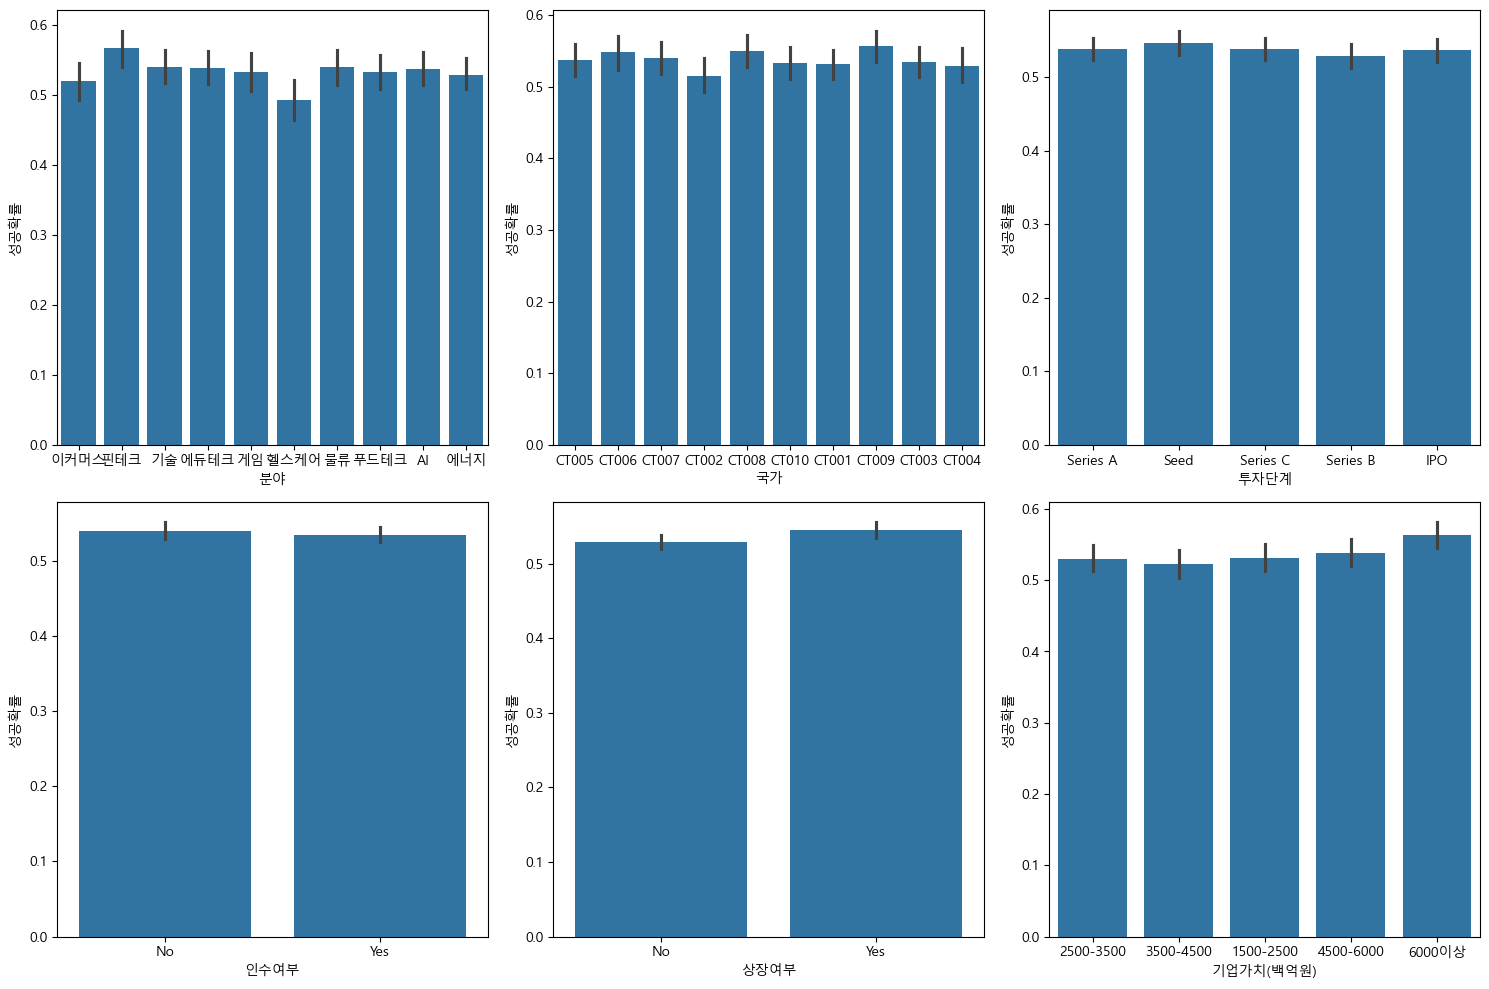

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

colm = ['분야', '국가', '투자단계', '인수여부', '상장여부', '기업가치(백억원)']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


for i, col in enumerate(colm):
    ax = axes[i//3, i%3]  # 2행 3열을 기준으로 위치 지정
    sns.barplot(x=col, y='성공확률', data=data, ax=ax)

# 레이아웃 조정 (서브플롯 간 간격을 조정)
plt.tight_layout()
plt.show()


barplot으로 각 범주형 데이터의 성공확률 평균을 그래프로 그렸습니다. 그린 모든 특성들이 유의미한 차이는 보이지 않습니다.

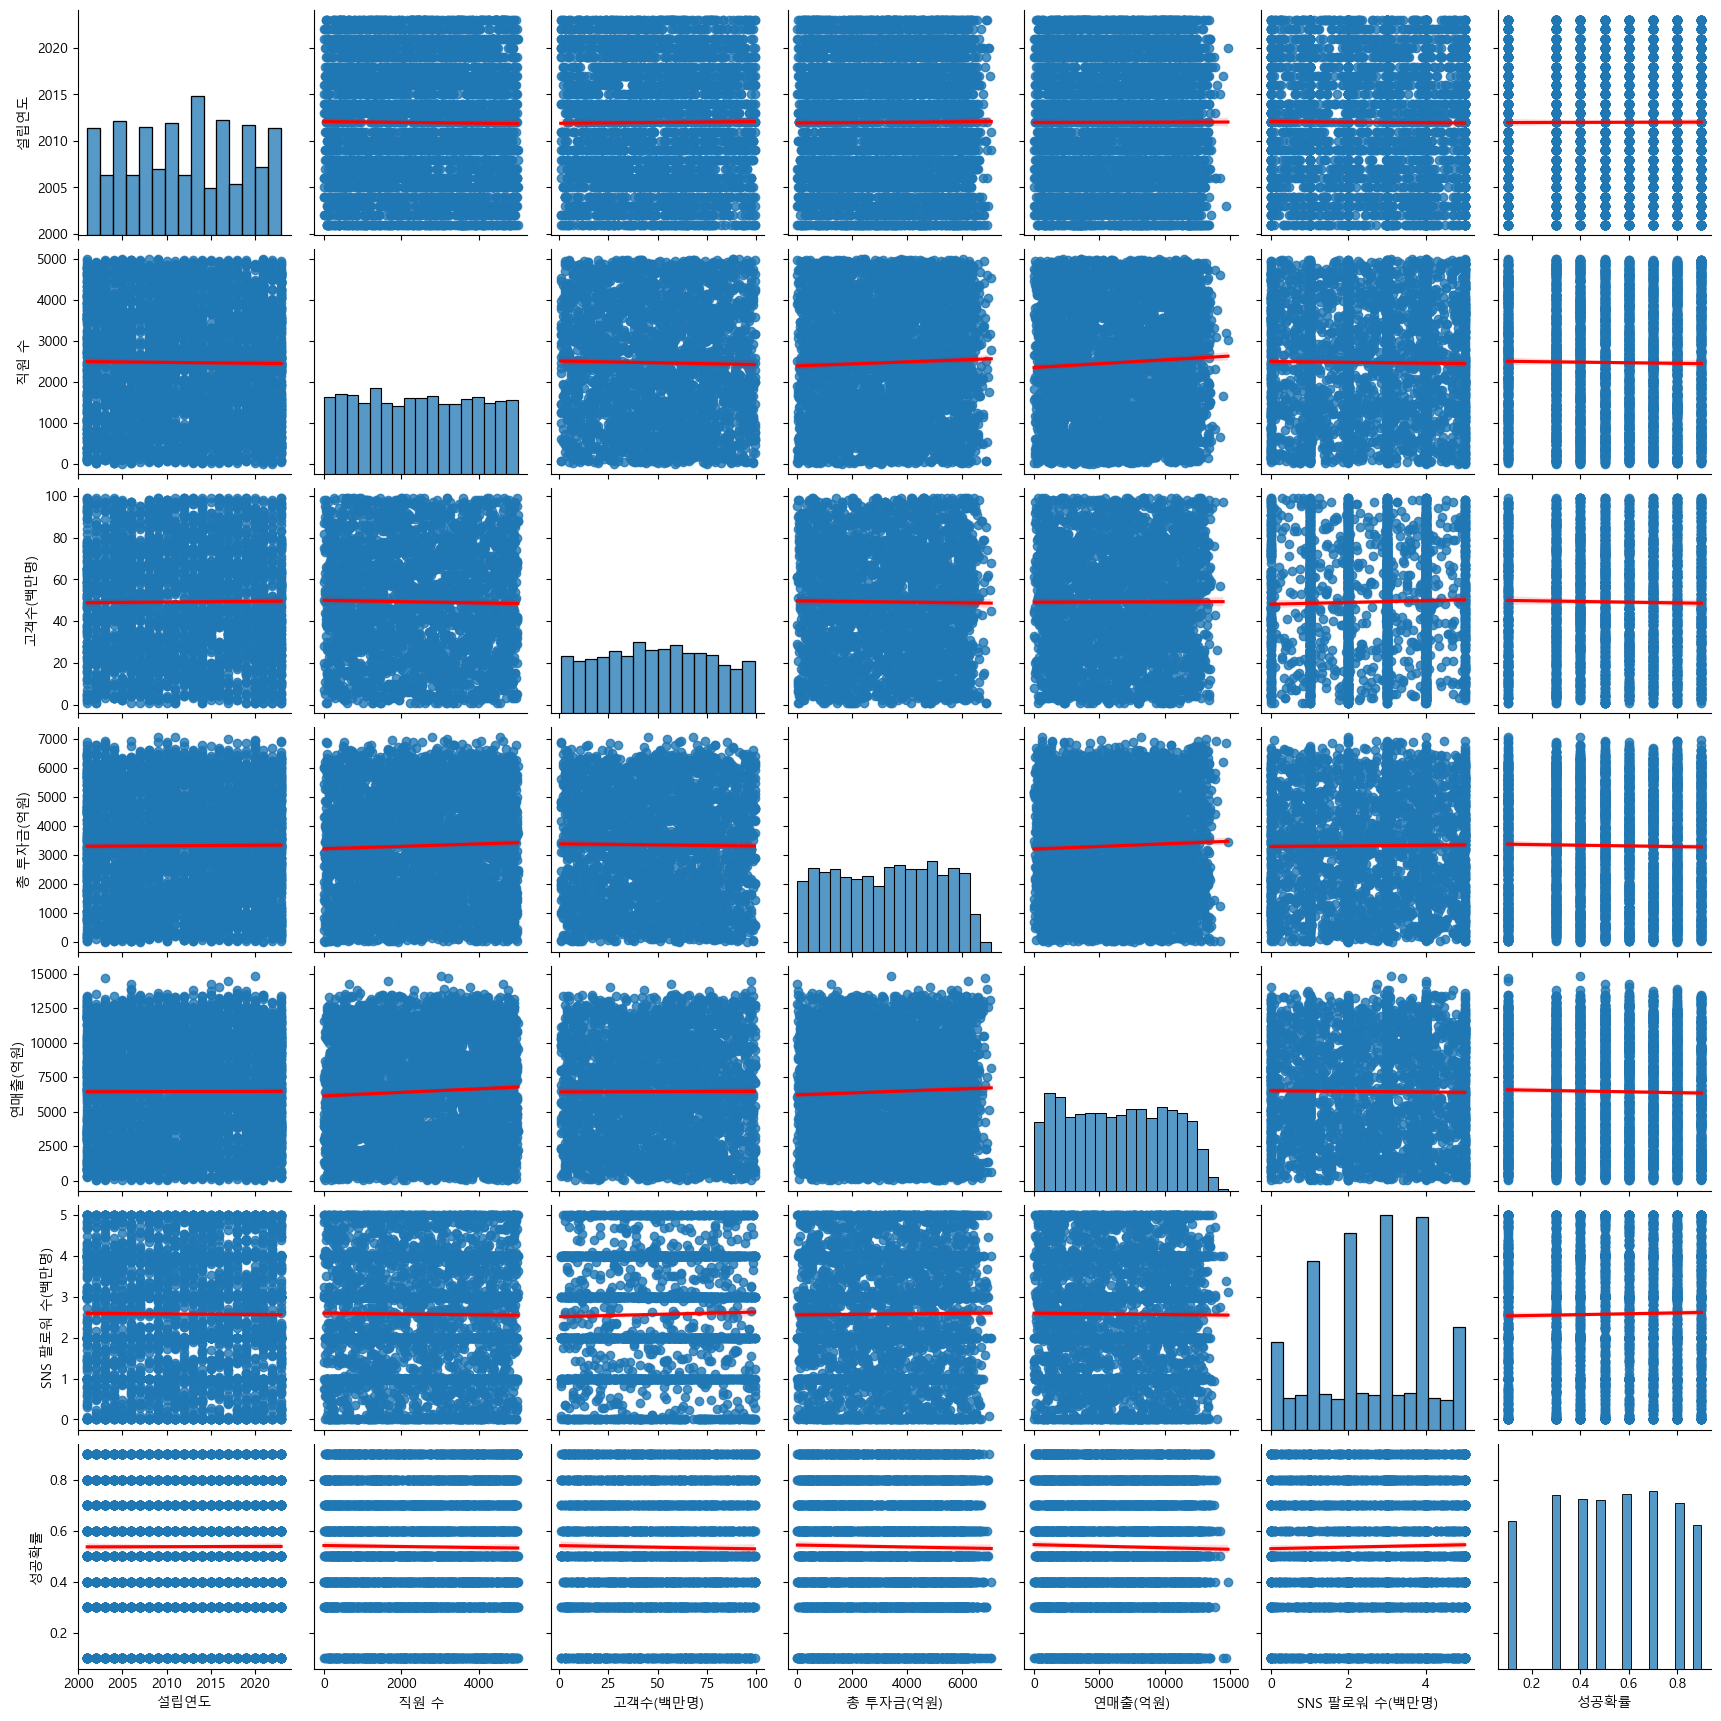

In [139]:
sns.pairplot(data, kind= 'reg',plot_kws={'line_kws': {'color': 'red'}})
plt.show()

각 특성들의 관계를 그래프와 회귀선을 통해 보는데 아무리 봐도 유의미한 회귀선을 못찾겠습니다. 그나마 뽑자면 연매출(억원) 과 직원수가 약간 비례한느 것 같습니다.  

In [203]:
data = data[['분야', '국가', '상장여부', '기업가치(백억원)', 'SNS 팔로워 수(백만명)', '총 투자금(억원)', '연매출(억원)', '직원 수','성공확률']]
ex = ex[['분야', '국가', '상장여부', '기업가치(백억원)', 'SNS 팔로워 수(백만명)', '총 투자금(억원)', '연매출(억원)', '직원 수']]
col = ['국가', '분야','상장여부', '기업가치(백억원)']
encoding_data = pd.get_dummies(data, columns=col)
encoding_ex = pd.get_dummies(ex, columns=col)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = encoding_data.drop(['성공확률'], axis= 1)
y = encoding_data['성공확률']

rdf = RandomForestRegressor()

cross_score = cross_val_score(rdf, X, y, cv = 5)

rdf.fit(X,y) 

result = rdf.predict(encoding_ex)

sample = pd.read_csv(r"C:\Users\302-28\git-repo\Dacon\기업 성공 확률 예측 해커톤\data\sample_submission.csv")

sample['성공확률'] = result

print(cross_score, np.mean(cross_score))

sample.to_csv('result.csv', index= False)

[ 0.02165723  0.0230598  -0.02273068  0.00705681 -0.03496437] -0.0011842410455845443


In [213]:
col = ['국가', '분야', '투자단계', '인수여부','상장여부', '기업가치(백억원)']
encoding_data = pd.get_dummies(data, columns=col)
encoding_ex = pd.get_dummies(ex, columns=col)

In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = encoding_data.drop(['성공확률'], axis= 1)
y = encoding_data['성공확률']

rdf = RandomForestRegressor()

cross_score = cross_val_score(rdf, X, y, cv = 5)

rdf.fit(X,y)

result = rdf.predict(encoding_ex)

sample = pd.read_csv(r"C:\Users\302-28\git-repo\Dacon\기업 성공 확률 예측 해커톤\data\sample_submission.csv")

sample['성공확률'] = result

print(cross_score, np.mean(cross_score))

sample.to_csv('result_all_fitu.csv', index= False)

[ 0.02030743  0.01448367 -0.01583466  0.01777318 -0.0196334 ] 0.0034192433022820047
